### Random Forests 
-  Bagging applied to decision trees 
-  Random feature selection at each split 
-  Reduces overfitting and improves generalization 

#### Parameters to know: 
-  n_estimators – number of trees 
-  max_depth – maximum depth of each tree 
-  max_features – number of features to consider at each split 

# Random Forests – Concept

---

## 1. Motivation: Why Random Forests?

Decision trees are:
- Easy to understand
- Able to model nonlinear relationships
- Very flexible

However, they suffer from a major drawback:

> **High variance** – small changes in data can produce very different trees.

Even with bagging, many trees can still look similar because:
- Strong predictors dominate the splits
- Trees become highly correlated

Random Forests are designed to **break this correlation**.

---

## 2. What is a Random Forest?

A Random Forest is an **ensemble of decision trees** where:

- Each tree is trained on a **bootstrap sample** of the data
- At each split, the tree considers only a **random subset of features**
- Final prediction is obtained by **aggregating** individual tree predictions

This combination leads to **strong generalization performance**.

---

## 3. Relationship with Bagging

Random Forests are built directly on the idea of bagging.

### Bagging recap
- Uses bootstrap sampling
- Trains multiple independent models
- Aggregates predictions

### Random Forest enhancement
- Adds **feature-level randomness**
- Prevents dominance of strong predictors

\[
\text{Random Forest} = \text{Bagging} + \text{Random Feature Selection}
\]

---

## 4. Bootstrap Sampling in Random Forests

For each tree:
- A new dataset is created by sampling **with replacement**
- Dataset size equals original training set
- Around 63% unique samples are used

This ensures:
- Diversity among trees
- Reduced variance

---

## 5. Random Feature Selection (Key Innovation)

At **each split** in a decision tree:
- Only a random subset of features is evaluated
- The best split is chosen from this subset

### Typical choices

| Task | max_features |
|---|---|
| Classification | √(total features) |
| Regression | (total features) / 3 |

### Why this works

- Prevents strong features from dominating all trees
- Forces trees to explore different patterns
- Reduces correlation between trees

---

## 6. Tree Construction Strategy

Random Forest trees are usually:
- Grown **deep** (often without pruning)
- Allowed to overfit individually

Why this is okay:
- Overfitting trees are high-variance
- Averaging them reduces variance dramatically

---

## 7. Prediction and Aggregation

### Classification

Each tree predicts a class label.

Final prediction:
\[
\hat{y} = \text{majority vote of all trees}
\]

### Regression

Each tree predicts a numeric value.

Final prediction:
\[
\hat{y} = \text{average of all tree predictions}
\]

---

## 8. Bias–Variance Trade-off

| Aspect | Effect |
|---|---|
| Bias | Slight increase |
| Variance | Strong decrease |
| Overfitting | Greatly reduced |
| Stability | Highly improved |

Random Forests focus on **variance reduction**, not bias reduction.

---

## 9. Why Random Forests Generalize Well

Random Forests succeed because:
- Trees are trained on different data subsets
- Trees see different feature subsets
- Errors made by individual trees are less correlated

Uncorrelated errors cancel out when aggregated.

---

## 10. Random Forest vs Single Decision Tree

| Property | Decision Tree | Random Forest |
|---|---|---|
| Variance | High | Low |
| Overfitting | Common | Rare |
| Stability | Low | High |
| Accuracy | Moderate | High |
| Interpretability | Easy | Hard |

---

## 11. Random Forest vs Bagging

| Aspect | Bagging Trees | Random Forest |
|---|---|---|
| Data Randomness | Yes | Yes |
| Feature Randomness | No | Yes |
| Tree Correlation | High | Low |
| Performance | Good | Better |

---

## 12. Out-of-Bag (OOB) Error

Because each tree:
- Is trained on a bootstrap sample
- Leaves out ~37% of data

These unused samples can be:
- Used to estimate generalization error
- Used for internal validation

This makes Random Forests efficient and robust.

---

## 13. When to Use Random Forests

Random Forests are effective when:
- Dataset has nonlinear relationships
- Features interact in complex ways
- Overfitting is a concern
- Interpretability is not the primary goal

---

## 14. Limitations

- Computationally expensive
- Large memory footprint
- Less interpretable than single trees
- Can struggle with very high-dimensional sparse data

---

## 15. Intuitive Analogy

Think of Random Forests as:
> Asking many experts, each looking at different evidence, and trusting the consensus.

---

## 16. One-line Summary

**Random Forests reduce overfitting and improve generalization by combining bagging with random feature selection in decision trees.**


| Aspect              | Single Tree | Bagging Trees | Random Forest   |
| ------------------- | ----------- | ------------- | --------------- |
| Overfitting         | High        | Medium        | Low             |
| Feature Correlation | High        | High          | Reduced         |
| Stability           | Low         | Better        | Very High       |
| Accuracy            | Variable    | Better        | Best            |
| Bias                | Low         | Low           | Slightly Higher |


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Creating a noisy and nonlinear dataset
X,y = make_classification(
    n_samples = 600,
    n_features = 6,
    n_informative=4,
    n_redundant=0,
    flip_y=0.2,
    class_sep=0.8,
    random_state=42
)

X_train, X_test, y_train,y_test = train_test_split(
    X,y,test_size = 0.3, random_state=42
)
# Bootstrap sampling 
def bootstrap_sample(X,y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples,n_samples,replace=True)
    return X[indices],y[indices]

# Random Feature selection at each tree
def random_feature_subset(n_features, max_features):
    return np.random.choice(
        n_features,
        size = max_features,
        replace = False
    )
# Training Random Forest (from scratch)
# Each tree:
# Uses a bootstrap dataset
# Uses only a random subset of features
# Is kept shallow to reduce overfitting
n_trees = 30
max_features = int(np.sqrt(X.shape[1]))
max_depth = 5

forest = []

for i in range(n_trees):
    X_boot, y_boot = bootstrap_sample(X_train,y_train)
    feature_idx = random_feature_subset(X.shape[1],max_features)
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_boot[:,feature_idx],y_boot)
    forest.append((tree,feature_idx))

# Prediction with majority voting 
def random_forest_predcit(forest,X):
    all_preds = []
    for tree, feature_idx in forest:
        preds = tree.predict(X[:,feature_idx])
        all_preds.append(preds)
        
    all_preds = np.array(all_preds)
    
    final_preds = []
    for i in range(all_preds.shape[1]):
        values, counts = np.unique(all_preds[:,i],return_counts=True)
        final_preds.append(values[np.argmax(counts)])
        
    return np.array(final_preds)

# Compare with single decision tree
# single tree
single_tree = DecisionTreeClassifier(max_depth=5)
single_tree.fit(X_train,y_train)
y_pred_single = single_tree.predict(X_test)

acc_single = accuracy_score(y_test,y_pred_single)
print("Single Tree Accuracy :",acc_single)

# Random Forest
y_pred_rf = random_forest_predcit(forest,X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)

print("Random Forest Accuracy:",acc_rf)


Single Tree Accuracy : 0.6944444444444444
Random Forest Accuracy: 0.6944444444444444


### RandomForestClassifier and RandomForestRegressor

Accuracy: 0.9415204678362573
F1-Score: 0.9537037037037037


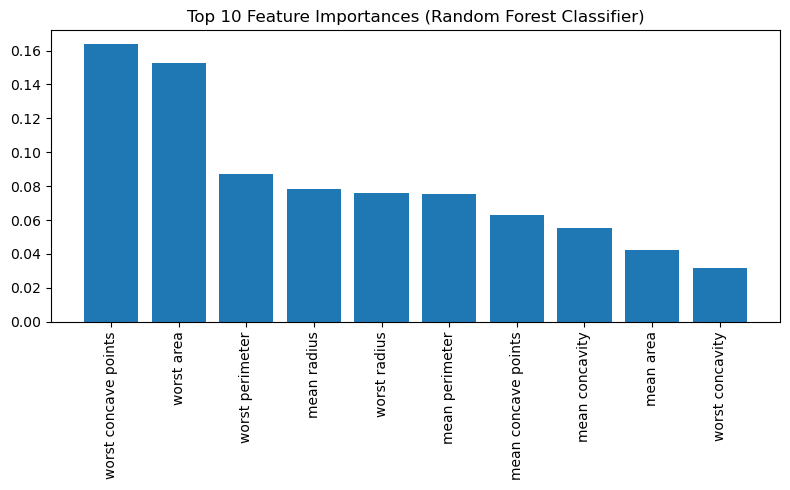

In [14]:
#  1. Random Forest – Classification Example

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators =100,
    max_depth = 5,
    random_state= 42
)
rf_clf.fit(X_train,y_train)
# prediction and Evaluate
y_pred = rf_clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Accuracy:",acc)
print("F1-Score:",f1)

# 2. Feature Importance Visualization (Classification)

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(10),importances[indices][:10])
plt.xticks(range(10),feature_names[indices][:10],rotation=90)
plt.title("Top 10 Feature Importances (Random Forest Classifier)")
plt.tight_layout()
plt.show()

### 3. Random Forest – Regression Example

RMSE: 0.5426776629487852


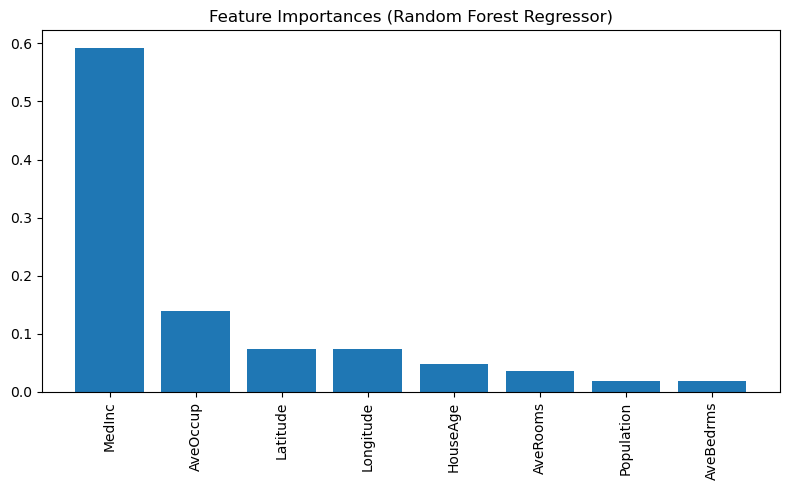

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X,y = data.data, data.target
feature_names = data.feature_names

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Training Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators = 100,
    max_depth = 10,
    random_state=42
)

rf_reg.fit(X_train,y_train)

# Predictions and RMSE
y_pred = rf_reg.predict(X_test)
rmse = mean_squared_error(y_test,y_pred, squared=False)
print("RMSE:",rmse)

# Feature Importance Visualization  (Regression)

importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(feature_names)),importances[indices])
plt.xticks(range(len(feature_names)),np.array(feature_names)[indices],rotation=90)
plt.title("Feature Importances (Random Forest Regressor)")
plt.tight_layout()
plt.show()

### What to Practice Next 
- Change n_estimators → 10, 50, 200
- Change max_depth → observe overfitting vs underfitting
- Compare accuracy vs F1 for imbalanced data
- Compare feature importance with: shallow trees, deep trees

### Key Takeaways
- RandomForestClassifier works for classification problems
- RandomForestRegressor works for continuous targets
- Feature importance reflects how often and how effectively a feature is used
- Depth control is crucial for generalization